In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from tqdm.auto import tqdm

In [3]:
df1 = pd.read_csv('/home/vsarg/Downloads/Ankur Formal Project/Datasets/5a_40A.csv')
df2 = pd.read_csv('/home/vsarg/Downloads/Ankur Formal Project/Datasets/5a_45A.csv')
df3 = pd.read_csv('/home/vsarg/Downloads/Ankur Formal Project/Datasets/5a_50A.csv')
df4 = pd.read_csv('/home/vsarg/Downloads/Ankur Formal Project/Datasets/5a_60A.csv')
df5 = pd.read_csv('/home/vsarg/Downloads/Ankur Formal Project/Datasets/5b_40A.csv', header = None)
df6 = pd.read_csv('/home/vsarg/Downloads/Ankur Formal Project/Datasets/5b_45A.csv', header = None)
df7 = pd.read_csv('/home/vsarg/Downloads/Ankur Formal Project/Datasets/5b_50A.csv', header = None)
df8 = pd.read_csv('/home/vsarg/Downloads/Ankur Formal Project/Datasets/5b_60A.csv', header = None)

df5.columns = df1.columns
df6.columns = df1.columns
df7.columns = df1.columns
df8.columns = df1.columns

In [4]:
df6.shape

(7096, 2)

In [5]:
df6.describe()

,Hours,Temperature
count,7096.000000,7096.000000
mean,2.093599,33.222373
std,1.125794,5.703841
min,0.336153,15.048455
25%,1.088782,30.713714
50%,2.038701,35.547233
75%,3.063519,37.410758
max,4.143139,38.284285


In [58]:
# df1.insert(0, "Current", 40*np.ones(len(df1)))
# df2.insert(0, "Current", 45*np.ones(len(df2)))
# df3.insert(0, "Current", 50*np.ones(len(df3)))
# df4.insert(0, "Current", 60*np.ones(len(df4)))

# df5.insert(0, "Current", 40*np.ones(len(df5)))
# df6.insert(0, "Current", 45*np.ones(len(df6)))
# df7.insert(0, "Current", 50*np.ones(len(df7)))
# df8.insert(0, "Current", 60*np.ones(len(df8)))

In [59]:
# df180 = pd.concat([df1, df2, df3, df4])
# df300 = pd.concat([df5, df6, df7, df8])

In [60]:
# plt.figure(figsize=(15, 12), dpi=80)
# plt.scatter(df180['Hours'], df180['Temperature'], linewidths = 1)

<AxesSubplot: xlabel='Hours', ylabel='Temperature'>

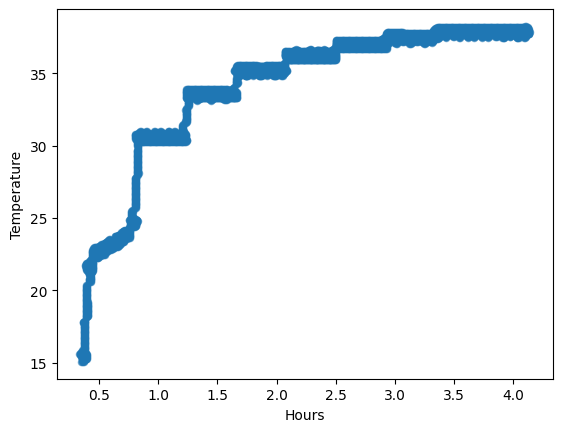

In [6]:
df6.plot.scatter(x="Hours", y="Temperature", alpha=0.5)

In [8]:
# create features
from copy import deepcopy

def transform(X: pd.DataFrame) -> pd.DataFrame:
    new_X = deepcopy(X)
    new_X.insert(0, "X1^0", np.ones(len(X)))
    new_X.rename(columns = {
        "Hours": "X1^1"
    }, inplace=True)

    for power in range(2, 10):
        new_X.insert(
            len(new_X.columns) - 1,
            f"X1^{power}",
            (new_X["X1^1"] ** power)
        )
    
    return new_X

In [19]:
df_transformed = transform(df8)
X_transformed = df_transformed.loc[ : , df_transformed.columns != 'Temperature']
y = df_transformed.iloc[:, -1]

train = df_transformed.sample(frac=0.8)
test = df_transformed.drop(train.index)
train

,X1^0,X1^1,X1^2,X1^3,X1^4,X1^5,X1^6,X1^7,X1^8,X1^9,Temperature
4079,1.0,1.636812,2.679155,4.385274,7.177871,11.748828,19.230627,3.147693e+01,5.152183e+01,8.433157e+01,45.097800
575,1.0,0.270390,0.073111,0.019768,0.005345,0.001445,0.000391,1.056647e-04,2.857065e-05,7.725207e-06,15.397866
4470,1.0,1.826796,3.337185,6.096357,11.136802,20.344670,37.165568,6.789392e+01,1.240284e+02,2.265746e+02,45.680151
1993,1.0,0.650357,0.422965,0.275078,0.178899,0.116348,0.075668,4.921130e-02,3.200494e-02,2.081465e-02,39.099578
1465,1.0,0.548058,0.300368,0.164619,0.090221,0.049446,0.027099,1.485210e-02,8.139821e-03,4.461097e-03,32.286064
...,...,...,...,...,...,...,...,...,...,...,...
6204,1.0,2.667110,7.113475,18.972418,50.601522,134.959816,359.952648,9.600332e+02,2.560514e+03,6.829172e+03,46.786619
380,1.0,0.233854,0.054688,0.012789,0.002991,0.000699,0.000164,3.824872e-05,8.944625e-06,2.091738e-06,15.106690
5928,1.0,2.535582,6.429178,16.301712,41.334336,104.806618,265.745823,6.738205e+02,1.708527e+03,4.332112e+03,45.854857
220,1.0,0.138862,0.019283,0.002678,0.000372,0.000052,0.000007,9.956123e-07,1.382530e-07,1.919813e-08,14.815515


In [20]:
y

0       15.630807
1       15.689042
2       15.630807
3       15.630807
4       15.572572
          ...    
6713    47.019560
6714    46.961325
6715    46.903090
6716    47.019560
6717    46.961325
Name: Temperature, Length: 6718, dtype: float64

In [11]:
X_train = train.iloc[:, :-1]
Y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
Y_test = test.iloc[:, -1]

In [12]:
mean = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

X_train = (X_train - mean) / sigma
X_test = (X_test - mean) / sigma

X_train.iloc[:, 0] = np.ones(len(X_train))
X_test.iloc[:, 0] = np.ones(len(X_test))

meany = np.mean(Y_train, axis=0)
sigmay = np.std(Y_train, axis=0)

Y_train = (Y_train - meany) / sigmay
Y_test = (Y_test - meany) / sigmay

X_train

,X1^0,X1^1,X1^2,X1^3,X1^4,X1^5,X1^6,X1^7,X1^8,X1^9
2339,1.0,-0.634663,-0.750196,-0.725134,-0.663770,-0.603170,-0.551922,-0.509997,-0.475563,-0.446852
2047,1.0,-0.789361,-0.828046,-0.757100,-0.675524,-0.607209,-0.553250,-0.510420,-0.475694,-0.446892
1635,1.0,-0.918275,-0.882426,-0.775816,-0.681292,-0.608871,-0.553707,-0.510542,-0.475726,-0.446901
1840,1.0,-0.883898,-0.868857,-0.771457,-0.680041,-0.608536,-0.553622,-0.510521,-0.475721,-0.446899
840,1.0,-1.244859,-0.977493,-0.799116,-0.686551,-0.610008,-0.553947,-0.510592,-0.475736,-0.446903
...,...,...,...,...,...,...,...,...,...,...
5272,1.0,1.015445,0.934979,0.775859,0.599512,0.432580,0.285530,0.161269,0.059173,-0.022936
2883,1.0,-0.342456,-0.565666,-0.629740,-0.619471,-0.583881,-0.543868,-0.506730,-0.474265,-0.446345
270,1.0,-1.390963,-1.000201,-0.802058,-0.686899,-0.610047,-0.553951,-0.510592,-0.475737,-0.446903
656,1.0,-1.262048,-0.980800,-0.799634,-0.686624,-0.610017,-0.553948,-0.510592,-0.475737,-0.446903


In [15]:
class PolynomialRegressionModel:
    def __init__(self, degree: int, learning_rate: np.float64) -> None:
        self.degree = degree
        self.learning_rate = learning_rate

    def fit(self):
        raise NotImplementedError("Please implement fit in child class")

    def calculateTestError(self, X_test: pd.DataFrame, Y_test: pd.DataFrame) -> np.float64:
        Y_predict = self.predict(X_test, self.W)
        Y_actual = Y_test
        self.test_error = self.computeError(Y_predict, Y_actual)
        return self.test_error

    def predict(self, X: pd.DataFrame, W: np.ndarray) -> np.ndarray:
        return np.dot(X, W)

    def getFeatureCount(self) -> int:
        degree = self.degree
        return ((degree + 2) * (degree + 1)) // 2

    def computeError(self, Y_predict: np.ndarray, Y_actual: np.ndarray) -> np.float64:
        N = len(Y_actual)
        return ((1/ N) * sum((Y_predict - Y_actual) ** 2))
    
    def computeR2Error(self, Y_predict: np.ndarray, Y_actual: np.ndarray) -> np.float64:
        u = ((Y_actual - Y_predict)** 2).sum()
        v = ((Y_actual - Y_actual.mean())** 2).sum()
        return 1-(u/v)
    
    def computeMAEError(self, Y_predict: np.ndarray, Y_actual: np.ndarray) -> np.float64:
        N = len(Y_actual)
        return ((1/ N) * sum(abs(Y_predict - Y_actual)))

In [16]:
class GDPolynomialRegressionModel(PolynomialRegressionModel):
    def __init__(self, degree: int, learning_rate: np.float64, iters: int) -> None:
        super().__init__(degree, learning_rate)
        self.iters = iters
        self.eps = 1e-8

    def fit(self, X: pd.DataFrame, Y: pd.DataFrame):
        Y_actual = Y.values
        X = X.values
        N, dim = X.shape
        self.W = np.random.randn(dim)

        # gradient descent
        print(f"Degree = {self.degree}")
        self.error_history = []
        self.mae_history = []
        self.r2_history = []
        for i in tqdm(range(self.iters)):
            Y_predict = self.predict(X, self.W)
            prev_error = self.error_history[-1] if self.error_history != [] else np.Inf
            cur_error = self.computeError(Y_predict, Y_actual)
            prev_mae_error = self.mae_history[-1] if self.mae_history != [] else np.Inf
            cur_mae_error = self.computeMAEError(Y_predict, Y_actual)
            self.error_history.append(cur_error)
            self.mae_history.append(cur_mae_error)
            self.r2_history.append(self.computeR2Error(Y_predict, Y_actual))
            if abs(prev_error - cur_error) < self.eps:
                break

            # update weights
            self.W = self.W - (self.learning_rate * np.dot(X.T, Y_predict - Y_actual)) / N
            
            if (i + 1) % 5000 == 0:
                print(f"Error after {i + 1} iterations: {self.error_history[-1]}")

        print(f"Final MSE Error: {self.error_history[-1]}\n")
        print(f"Final R2 Error: {self.r2_history[-1]}\n")
        print(f"Final RMSE Error: {np.sqrt(self.error_history[-1])}\n")
        print(f"Final MAE Error: {self.mae_history[-1]}\n")

In [17]:
gd_models = []
for degree in range(10):
    model = GDPolynomialRegressionModel(degree=degree, learning_rate=0.04, iters=50000)
    gd_models.append(model)
    num_features = model.getFeatureCount()
    model.fit(X_train.iloc[:, :num_features], Y_train)
    model.calculateTestError(X_test.iloc[:, :num_features], Y_test)

Degree = 0


  0%|          | 0/50000 [00:00<?, ?it/s]

Final MSE Error: 1.0000001111566714

Final R2 Error: -1.1115666809224933e-07

Final RMSE Error: 1.0000000555783342

Final MAE Error: 0.7729064180295608

Degree = 1


  0%|          | 0/50000 [00:00<?, ?it/s]

Final MSE Error: 0.1171719172224387

Final R2 Error: 0.8828280827775612

Final RMSE Error: 0.3423038375806481

Final MAE Error: 0.26709264832160134

Degree = 2


  0%|          | 0/50000 [00:00<?, ?it/s]

Error after 5000 iterations: 0.08210693613064295
Error after 10000 iterations: 0.07415723835398155
Error after 15000 iterations: 0.07250103849091047
Error after 20000 iterations: 0.0712392270597982
Error after 25000 iterations: 0.07006703143380631
Error after 30000 iterations: 0.0689648241855616
Error after 35000 iterations: 0.06792774129087728
Error after 40000 iterations: 0.06695189881048823
Error after 45000 iterations: 0.0660336775015145
Error after 50000 iterations: 0.06516967369979965
Final MSE Error: 0.06516967369979965

Final R2 Error: 0.9348303263002004

Final RMSE Error: 0.25528351631039486

Final MAE Error: 0.17588529872945194

Degree = 3


  0%|          | 0/50000 [00:00<?, ?it/s]

Error after 5000 iterations: 0.10403381408655422
Error after 10000 iterations: 0.08439026370348475
Error after 15000 iterations: 0.07479951399501573
Error after 20000 iterations: 0.06999315843169417
Error after 25000 iterations: 0.06746742170808133
Error after 30000 iterations: 0.0660322700851616
Error after 35000 iterations: 0.06512198793824434
Error after 40000 iterations: 0.06446755172168682
Error after 45000 iterations: 0.06394093629190498
Error after 50000 iterations: 0.063481126447837
Final MSE Error: 0.063481126447837

Final R2 Error: 0.9365188735521631

Final RMSE Error: 0.25195461188046747

Final MAE Error: 0.18020297978160688

Degree = 4


  0%|          | 0/50000 [00:00<?, ?it/s]

Error after 5000 iterations: 0.09859714618288198
Error after 10000 iterations: 0.08107709813785208
Error after 15000 iterations: 0.07251551496597557
Error after 20000 iterations: 0.06821776109851663
Error after 25000 iterations: 0.06595269556370702
Error after 30000 iterations: 0.06465986059044945
Error after 35000 iterations: 0.06383513229219329
Error after 40000 iterations: 0.06323877116424066
Error after 45000 iterations: 0.06275668252040989
Error after 50000 iterations: 0.06233448493138534
Final MSE Error: 0.06233448493138534

Final R2 Error: 0.9376655150686147

Final RMSE Error: 0.24966875041018918

Final MAE Error: 0.1773280883928875

Degree = 5


  0%|          | 0/50000 [00:00<?, ?it/s]

Error after 5000 iterations: 0.11389686959991882
Error after 10000 iterations: 0.08876030033538854
Error after 15000 iterations: 0.07656778073820357
Error after 20000 iterations: 0.07053341638266435
Error after 25000 iterations: 0.06743226957671568
Error after 30000 iterations: 0.06573160445674628
Error after 35000 iterations: 0.06470285391116594
Error after 40000 iterations: 0.06399961084160496
Error after 45000 iterations: 0.06345708220731648
Error after 50000 iterations: 0.0629967859965295
Final MSE Error: 0.0629967859965295

Final R2 Error: 0.9370032140034706

Final RMSE Error: 0.2509916054303998

Final MAE Error: 0.17850975277975725

Degree = 6


  0%|          | 0/50000 [00:00<?, ?it/s]

Error after 5000 iterations: 0.10989556916109913
Error after 10000 iterations: 0.08684760594073672
Error after 15000 iterations: 0.07564732342804353
Error after 20000 iterations: 0.07008417358810883
Error after 25000 iterations: 0.06720665127368303
Error after 30000 iterations: 0.0656119602191801
Error after 35000 iterations: 0.06463328260222755
Error after 40000 iterations: 0.06395355541314099
Error after 45000 iterations: 0.06342193019795002
Error after 50000 iterations: 0.06296655142997251
Final MSE Error: 0.06296655142997251

Final R2 Error: 0.9370334485700276

Final RMSE Error: 0.25093136796736376

Final MAE Error: 0.17869422289446033

Degree = 7


  0%|          | 0/50000 [00:00<?, ?it/s]

Error after 5000 iterations: 0.09786516895114493
Error after 10000 iterations: 0.08079119159949648
Error after 15000 iterations: 0.07244048849416142
Error after 20000 iterations: 0.06824186397080442
Error after 25000 iterations: 0.06602285245315644
Error after 30000 iterations: 0.06475087886814558
Error after 35000 iterations: 0.06393506883204542
Error after 40000 iterations: 0.06334197842047024
Error after 45000 iterations: 0.06286050392680785
Error after 50000 iterations: 0.06243768452038952
Final MSE Error: 0.06243768452038952

Final R2 Error: 0.9375623154796106

Final RMSE Error: 0.24987533795953037

Final MAE Error: 0.17740498553485864

Degree = 8


  0%|          | 0/50000 [00:00<?, ?it/s]

Error after 5000 iterations: 0.09083309825113668
Error after 10000 iterations: 0.07694581186379415
Error after 15000 iterations: 0.07012339067031646
Error after 20000 iterations: 0.06666455709648317
Error after 25000 iterations: 0.06481025162990976
Error after 30000 iterations: 0.0637243675675287
Error after 35000 iterations: 0.06300940607211751
Error after 40000 iterations: 0.06247630699083003
Error after 45000 iterations: 0.062035068370439816
Error after 50000 iterations: 0.06164276684204335
Final MSE Error: 0.06164276684204335

Final R2 Error: 0.9383572331579567

Final RMSE Error: 0.24827961422968933

Final MAE Error: 0.17556528950080183

Degree = 9


  0%|          | 0/50000 [00:00<?, ?it/s]

Error after 5000 iterations: 0.07684117554007674
Error after 10000 iterations: 0.07066123115134666
Error after 15000 iterations: 0.06749113975000594
Error after 20000 iterations: 0.06575788598026902
Error after 25000 iterations: 0.06471381874308864
Error after 30000 iterations: 0.0640034620421473
Error after 35000 iterations: 0.06345771327751967
Error after 40000 iterations: 0.06299604259402546
Error after 45000 iterations: 0.06258001619192385
Error after 50000 iterations: 0.062191209670961894
Final MSE Error: 0.062191209670961894

Final R2 Error: 0.9378087903290383

Final RMSE Error: 0.2493816546399552

Final MAE Error: 0.17768600362708595



In [61]:
normalized = (X_transformed - mean)/sigma
normalized['X1^0'] = np.ones(len(normalized))
normalized

,X1^0,X1^1,X1^2,X1^3,X1^4,X1^5,X1^6,X1^7,X1^8,X1^9
0,1.0,-1.597226,-1.011398,-0.802749,-0.686942,-0.610050,-0.553952,-0.510592,-0.475737,-0.446903
1,1.0,-1.580038,-1.011398,-0.802749,-0.686942,-0.610050,-0.553952,-0.510592,-0.475737,-0.446903
2,1.0,-1.580038,-1.011398,-0.802749,-0.686942,-0.610050,-0.553952,-0.510592,-0.475737,-0.446903
3,1.0,-1.571443,-1.011334,-0.802748,-0.686942,-0.610050,-0.553952,-0.510592,-0.475737,-0.446903
4,1.0,-1.571443,-1.011334,-0.802748,-0.686942,-0.610050,-0.553952,-0.510592,-0.475737,-0.446903
...,...,...,...,...,...,...,...,...,...,...
6713,1.0,1.874877,2.431715,2.911383,3.338732,3.729407,4.093101,4.436010,4.762301,5.074906
6714,1.0,1.874877,2.431715,2.911383,3.338732,3.729407,4.093101,4.436010,4.762301,5.074906
6715,1.0,1.874877,2.431715,2.911383,3.338732,3.729407,4.093101,4.436010,4.762301,5.074906
6716,1.0,1.883471,2.448823,2.939100,3.378838,3.783514,4.162717,4.522573,4.867189,5.199452


In [63]:
y_pred = (normalized@(model.W))*sigmay + meany

In [64]:
X_transformed.shape, model.W.shape, y_pred.shape

((6718, 10), (10,), (6718,))

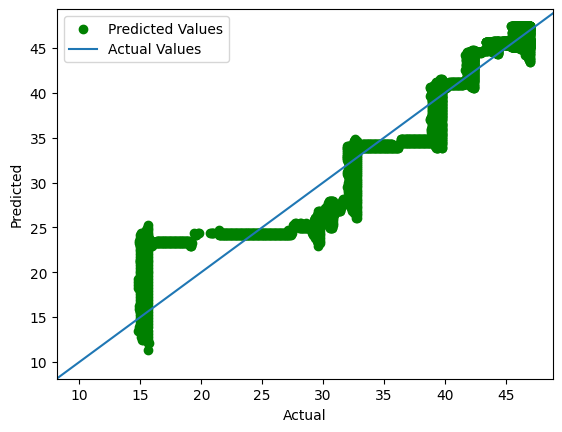

In [65]:
plt.ylabel("Predicted")
plt.xlabel("Actual")

plt.scatter(y,y_pred,color='green', label='Predicted Values')
plt.axline([10, 10], [35, 35],label='Actual Values')
plt.legend(loc ="upper left")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (6717, 10) and (6718,)

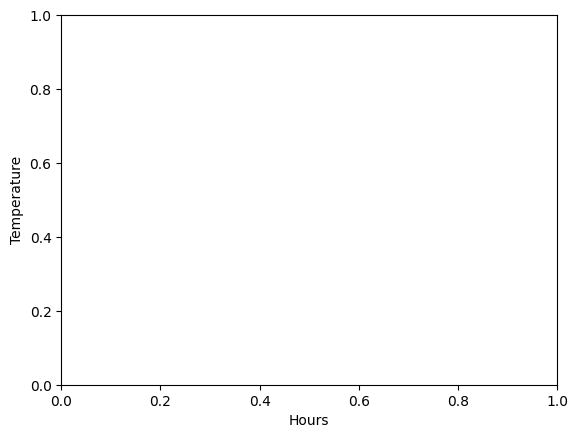

In [66]:
plt.ylabel("Temperature")
plt.xlabel("Hours")

plt.plot(X_transformed[ :-1], y_pred, marker='o', color='g',markersize=1, linestyle="-", label='Predicted Values')
plt.plot(X_transformed[ :-1], y, marker='o', color='b',linestyle="None",markersize=3, label='Actual Values(reference)')
plt.legend(loc ="lower right")
plt.show()

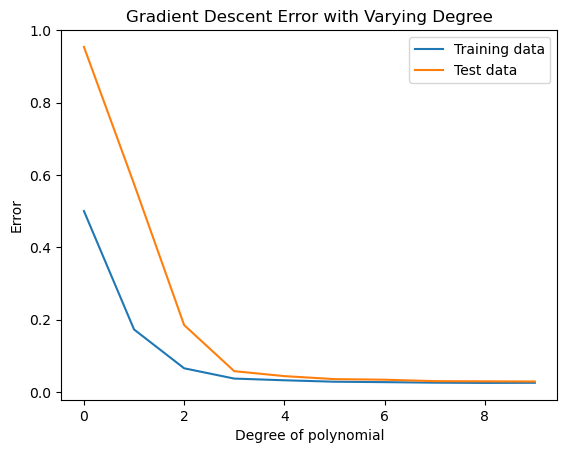

In [16]:
fig, ax = plt.subplots(1, 1)
ax.plot(list(range(10)), list(model.error_history[-1] for model in gd_models), label='Training data')
ax.plot(list(range(10)), list(model.test_error for model in gd_models), label='Test data')
ax.set_title('Gradient Descent Error with Varying Degree')
ax.set_xlabel('Degree of polynomial')
ax.set_ylabel('Error')
ax.legend()
plt.show()

In [21]:
class SGDPolynomialRegressionModel(PolynomialRegressionModel):
    def __init__(self, degree: int, learning_rate: np.float64, epoch: int) -> None:
        super().__init__(degree, learning_rate)
        self.epoch = epoch

    def fit(self, X: pd.DataFrame, Y:pd.DataFrame):
        Y_actual = Y.values
        N, dim = X.shape
        self.W = np.random.randn(dim)

        # stochastic gradient descent
        print(f"Degree = {self.degree}")
        self.y_predicted_history = []
        self.error_history = []
        for ep in range(self.epoch):
            for i in range(N):
                x = X.iloc[i:i + 1].values
                y_actual = Y.iloc[i:i + 1].values[0]
                y_predict = self.predict(x, self.W)
                self.W = self.W - (self.learning_rate * np.dot(np.transpose(x), y_predict - y_actual)) / N
            
            Y_predict = self.predict(X, self.W)
            self.error_history.append(self.computeError(Y_predict, Y_actual))
            if (ep + 1) % 100 == 0:
                print(f"Error after {ep + 1} epochs: {self.error_history[-1]}")

        print()

In [22]:
sgd_models = []
for degree in range(10):
    model = SGDPolynomialRegressionModel(degree=degree, learning_rate=0.04, epoch=2000)
    sgd_models.append(model)
    num_features = model.getFeatureCount()
    model.fit(X_train.iloc[:, :num_features], Y_train)
    model.calculateTestError(X_test.iloc[:, :num_features], Y_test)

Degree = 0
Error after 100 epochs: 0.5002469270484052
Error after 200 epochs: 0.5000000796991547
Error after 300 epochs: 0.5000000000001046
Error after 400 epochs: 0.5000000000302599
Error after 500 epochs: 0.5000000000313138
Error after 600 epochs: 0.500000000031336
Error after 700 epochs: 0.5000000000313323
Error after 800 epochs: 0.5000000000313395
Error after 900 epochs: 0.5000000000313393
Error after 1000 epochs: 0.5000000000313385
Error after 1100 epochs: 0.5000000000313385
Error after 1200 epochs: 0.5000000000313385
Error after 1300 epochs: 0.5000000000313385
Error after 1400 epochs: 0.5000000000313385
Error after 1500 epochs: 0.5000000000313385
Error after 1600 epochs: 0.5000000000313385
Error after 1700 epochs: 0.5000000000313385
Error after 1800 epochs: 0.5000000000313385
Error after 1900 epochs: 0.5000000000313385
Error after 2000 epochs: 0.5000000000313385

Degree = 1
Error after 100 epochs: 0.17973174086667465
Error after 200 epochs: 0.17265228501738408
Error after 300 epo

Error after 300 epochs: 0.03190101978755437
Error after 400 epochs: 0.03106767285254959
Error after 500 epochs: 0.030659088479165663
Error after 600 epochs: 0.0304004993732943
Error after 700 epochs: 0.03020022634323399
Error after 800 epochs: 0.03002669904455978
Error after 900 epochs: 0.02986839836820917
Error after 1000 epochs: 0.02972063267088069
Error after 1100 epochs: 0.029581138121638578
Error after 1200 epochs: 0.029448591200192595
Error after 1300 epochs: 0.02932208797501012
Error after 1400 epochs: 0.02920094857263446
Error after 1500 epochs: 0.0290846342035489
Error after 1600 epochs: 0.02897270550012169
Error after 1700 epochs: 0.028864797719599294
Error after 1800 epochs: 0.028760603997444196
Error after 1900 epochs: 0.028659863164372048
Error after 2000 epochs: 0.028562350534650446



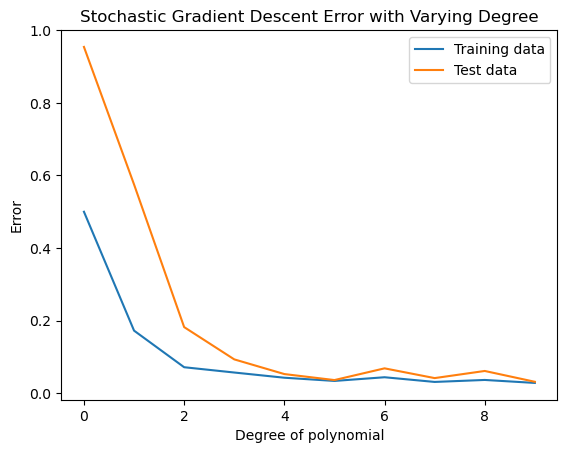

In [23]:
fig, ax = plt.subplots(1, 1)
ax.plot(list(range(10)), list(model.error_history[-1] for model in sgd_models), label='Training data')
ax.plot(list(range(10)), list(model.test_error for model in sgd_models), label='Test data')
ax.set_title('Stochastic Gradient Descent Error with Varying Degree')
ax.set_xlabel('Degree of polynomial')
ax.set_ylabel('Error')
ax.legend()
plt.show()

In [24]:
class RegularizedRegressionModel(PolynomialRegressionModel):
    def __init__(self, learning_rate: np.float64, iters: int, reg_factor: np.float64, lmd: np.float64) -> None:
        super().__init__(1, learning_rate)
        self.iters = iters
        self.eps = 1e-8
        self.reg_factor = reg_factor
        self.lmd = lmd

    def fit(self, X: pd.DataFrame, Y: pd.DataFrame):
        Y_actual = Y.values
        N, dim = X.shape
        self.W = np.random.randn(dim)

        # gradient descent
        self.error_history = []
        print(f"Regularization factor = {self.reg_factor}, lambda = {self.lmd}")
        for iter in range(self.iters):
            Y_predict = self.predict(X, self.W)
            prev_error = self.error_history[-1] if self.error_history != [] else np.Inf
            cur_error = self.computeError(Y_predict, Y_actual)
            self.error_history.append(self.computeError(Y_predict, Y_actual))
            if abs(prev_error - cur_error) < self.eps:
                break

            # update weights
            temp_wts = self.W
            temp_wts[temp_wts == 0] = 1
            # self.W = self.W - (self.learning_rate * (np.dot(np.transpose(X), Y_predict - Y_actual) + self.reg_factor * (abs(self.W) ** self.reg_factor - 1) * self.W / abs(self.W))) / N
            self.W = self.W - (self.learning_rate * (np.dot(np.transpose(X), Y_predict - Y_actual) + self.reg_factor * (abs(self.W) ** self.reg_factor - 1) * temp_wts / abs(temp_wts))) / N
            
            if (iter + 1) % 5000 == 0:
                print(f"Error after {iter + 1} iterations: {self.error_history[-1]}")

        print(f"Final Error: {self.error_history[-1]}\n")
    
    def computeError(self, Y_predict: np.ndarray, Y_actual: np.ndarray) -> np.float64:
        N = len(Y_actual)
        return ((0.5 / N) * sum((Y_predict - Y_actual) ** 2)) + (0.5 * self.lmd * sum(abs(self.W) ** self.reg_factor))

In [25]:
q_values = [0.5, 1, 2, 4]
lmd_values = np.multiply.outer(list(10 ** exp for exp in range(-3, 2)), list(range(1, 10))).flatten()
rgd_models = []
for q in q_values:
    models = []
    for lmd in lmd_values:
        model = RegularizedRegressionModel(learning_rate=0.01, iters=20000, reg_factor=q, lmd=lmd)
        models.append(model)
        model.fit(X_train, Y_train)
        model.calculateTestError(X_test, Y_test)
    rgd_models.append(models)

Regularization factor = 0.5, lambda = 0.001
Error after 5000 iterations: 0.06678593433953196
Error after 10000 iterations: 0.055316793546679704
Error after 15000 iterations: 0.05053679643771317
Final Error: 0.04908725503000545

Regularization factor = 0.5, lambda = 0.002
Error after 5000 iterations: 0.0739159994546443
Final Error: 0.07017293081743484

Regularization factor = 0.5, lambda = 0.003
Final Error: 0.10570080833650278

Regularization factor = 0.5, lambda = 0.004
Error after 5000 iterations: 0.11273334800852708
Final Error: 0.11192573835348295

Regularization factor = 0.5, lambda = 0.005
Error after 5000 iterations: 0.16628747685627165
Final Error: 0.15820171699748967

Regularization factor = 0.5, lambda = 0.006
Error after 5000 iterations: 0.15621605488750728
Final Error: 0.1557823357374593

Regularization factor = 0.5, lambda = 0.007
Error after 5000 iterations: 0.18244977077730506
Final Error: 0.1783793389671764

Regularization factor = 0.5, lambda = 0.008
Error after 5000 i

Error after 20000 iterations: 0.08223793924240846
Final Error: 0.08223793924240846

Regularization factor = 1, lambda = 0.004
Error after 5000 iterations: 0.11794355821412603
Error after 10000 iterations: 0.10684069461683499
Error after 15000 iterations: 0.10138548007047062
Error after 20000 iterations: 0.09863417369403632
Final Error: 0.09863417369403632

Regularization factor = 1, lambda = 0.005
Error after 5000 iterations: 0.13348166869475148
Error after 10000 iterations: 0.12621200071559763
Error after 15000 iterations: 0.12288911027683423
Error after 20000 iterations: 0.12115885281617765
Final Error: 0.12115885281617765

Regularization factor = 1, lambda = 0.006
Error after 5000 iterations: 0.17898498743255586
Error after 10000 iterations: 0.1737862152108107
Error after 15000 iterations: 0.17212716552024274
Error after 20000 iterations: 0.17122280159854975
Final Error: 0.17122280159854975

Regularization factor = 1, lambda = 0.007
Error after 5000 iterations: 0.16108739611415562
E

Error after 15000 iterations: 826.0208218226763
Error after 20000 iterations: 827.1783289075266
Final Error: 827.1783289075266

Regularization factor = 1, lambda = 50.0
Error after 5000 iterations: 923.7027159497821
Error after 10000 iterations: 930.1527702195505
Error after 15000 iterations: 935.3712297622234
Error after 20000 iterations: 939.6427432557751
Final Error: 939.6427432557751

Regularization factor = 1, lambda = 60.0
Error after 5000 iterations: 1213.713523293667
Error after 10000 iterations: 1223.2212618223602
Error after 15000 iterations: 1229.7377147577904
Error after 20000 iterations: 1235.0595501226821
Final Error: 1235.0595501226821

Regularization factor = 1, lambda = 70.0
Error after 5000 iterations: 1876.2359026645393
Error after 10000 iterations: 1876.731749067866
Error after 15000 iterations: 1878.627621917818
Error after 20000 iterations: 1880.5887501009197
Final Error: 1880.5887501009197

Regularization factor = 1, lambda = 80.0
Error after 5000 iterations: 158

Error after 5000 iterations: 54.48863618874997
Error after 10000 iterations: 54.06480463030025
Error after 15000 iterations: 54.43613166917341
Error after 20000 iterations: 54.93658212347827
Final Error: 54.93658212347827

Regularization factor = 2, lambda = 4.0
Error after 5000 iterations: 87.05105649131833
Error after 10000 iterations: 85.03441703498692
Error after 15000 iterations: 83.07040836798062
Error after 20000 iterations: 81.47191959845426
Final Error: 81.47191959845426

Regularization factor = 2, lambda = 5.0
Error after 5000 iterations: 101.99021522959497
Error after 10000 iterations: 99.61099342186372
Error after 15000 iterations: 97.27141326185361
Error after 20000 iterations: 95.36039548054724
Final Error: 95.36039548054724

Regularization factor = 2, lambda = 6.0
Error after 5000 iterations: 148.44587618325102
Error after 10000 iterations: 144.14498417884226
Error after 15000 iterations: 140.38069705027738
Error after 20000 iterations: 137.40921151451496
Final Error: 13

Error after 5000 iterations: 2.0084425916735924
Error after 10000 iterations: 1.6481488417708556
Error after 15000 iterations: 1.4890656151193835
Error after 20000 iterations: 1.4064437893247725
Final Error: 1.4064437893247725

Regularization factor = 4, lambda = 0.08
Error after 5000 iterations: 4.188397723923243
Error after 10000 iterations: 3.097274754209272
Error after 15000 iterations: 2.5618071444596477
Error after 20000 iterations: 2.2541331162112264
Final Error: 2.2541331162112264

Regularization factor = 4, lambda = 0.09
Error after 5000 iterations: 2.7194499531822944
Error after 10000 iterations: 2.20857087001533
Error after 15000 iterations: 1.969313305660105
Error after 20000 iterations: 1.8373610228282526
Final Error: 1.8373610228282526

Regularization factor = 4, lambda = 0.1
Error after 5000 iterations: 2.7394256409795665
Error after 10000 iterations: 2.182566431575055
Error after 15000 iterations: 1.9437794471916001
Error after 20000 iterations: 1.8279430233253713
Final

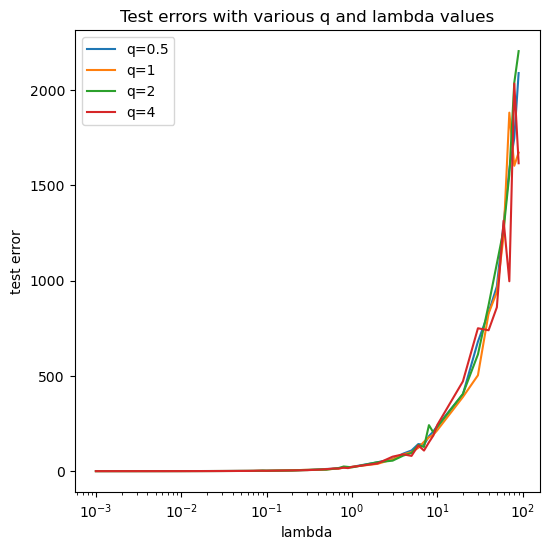

In [26]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(6)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel('lambda')
ax.set_ylabel('test error')
ax.set_title('Test errors with various q and lambda values')


for models in rgd_models:
    reg_factor = models[0].reg_factor
    ax.plot(lmd_values, list(model.test_error for model in models), label=f"q={reg_factor}")

plt.legend()

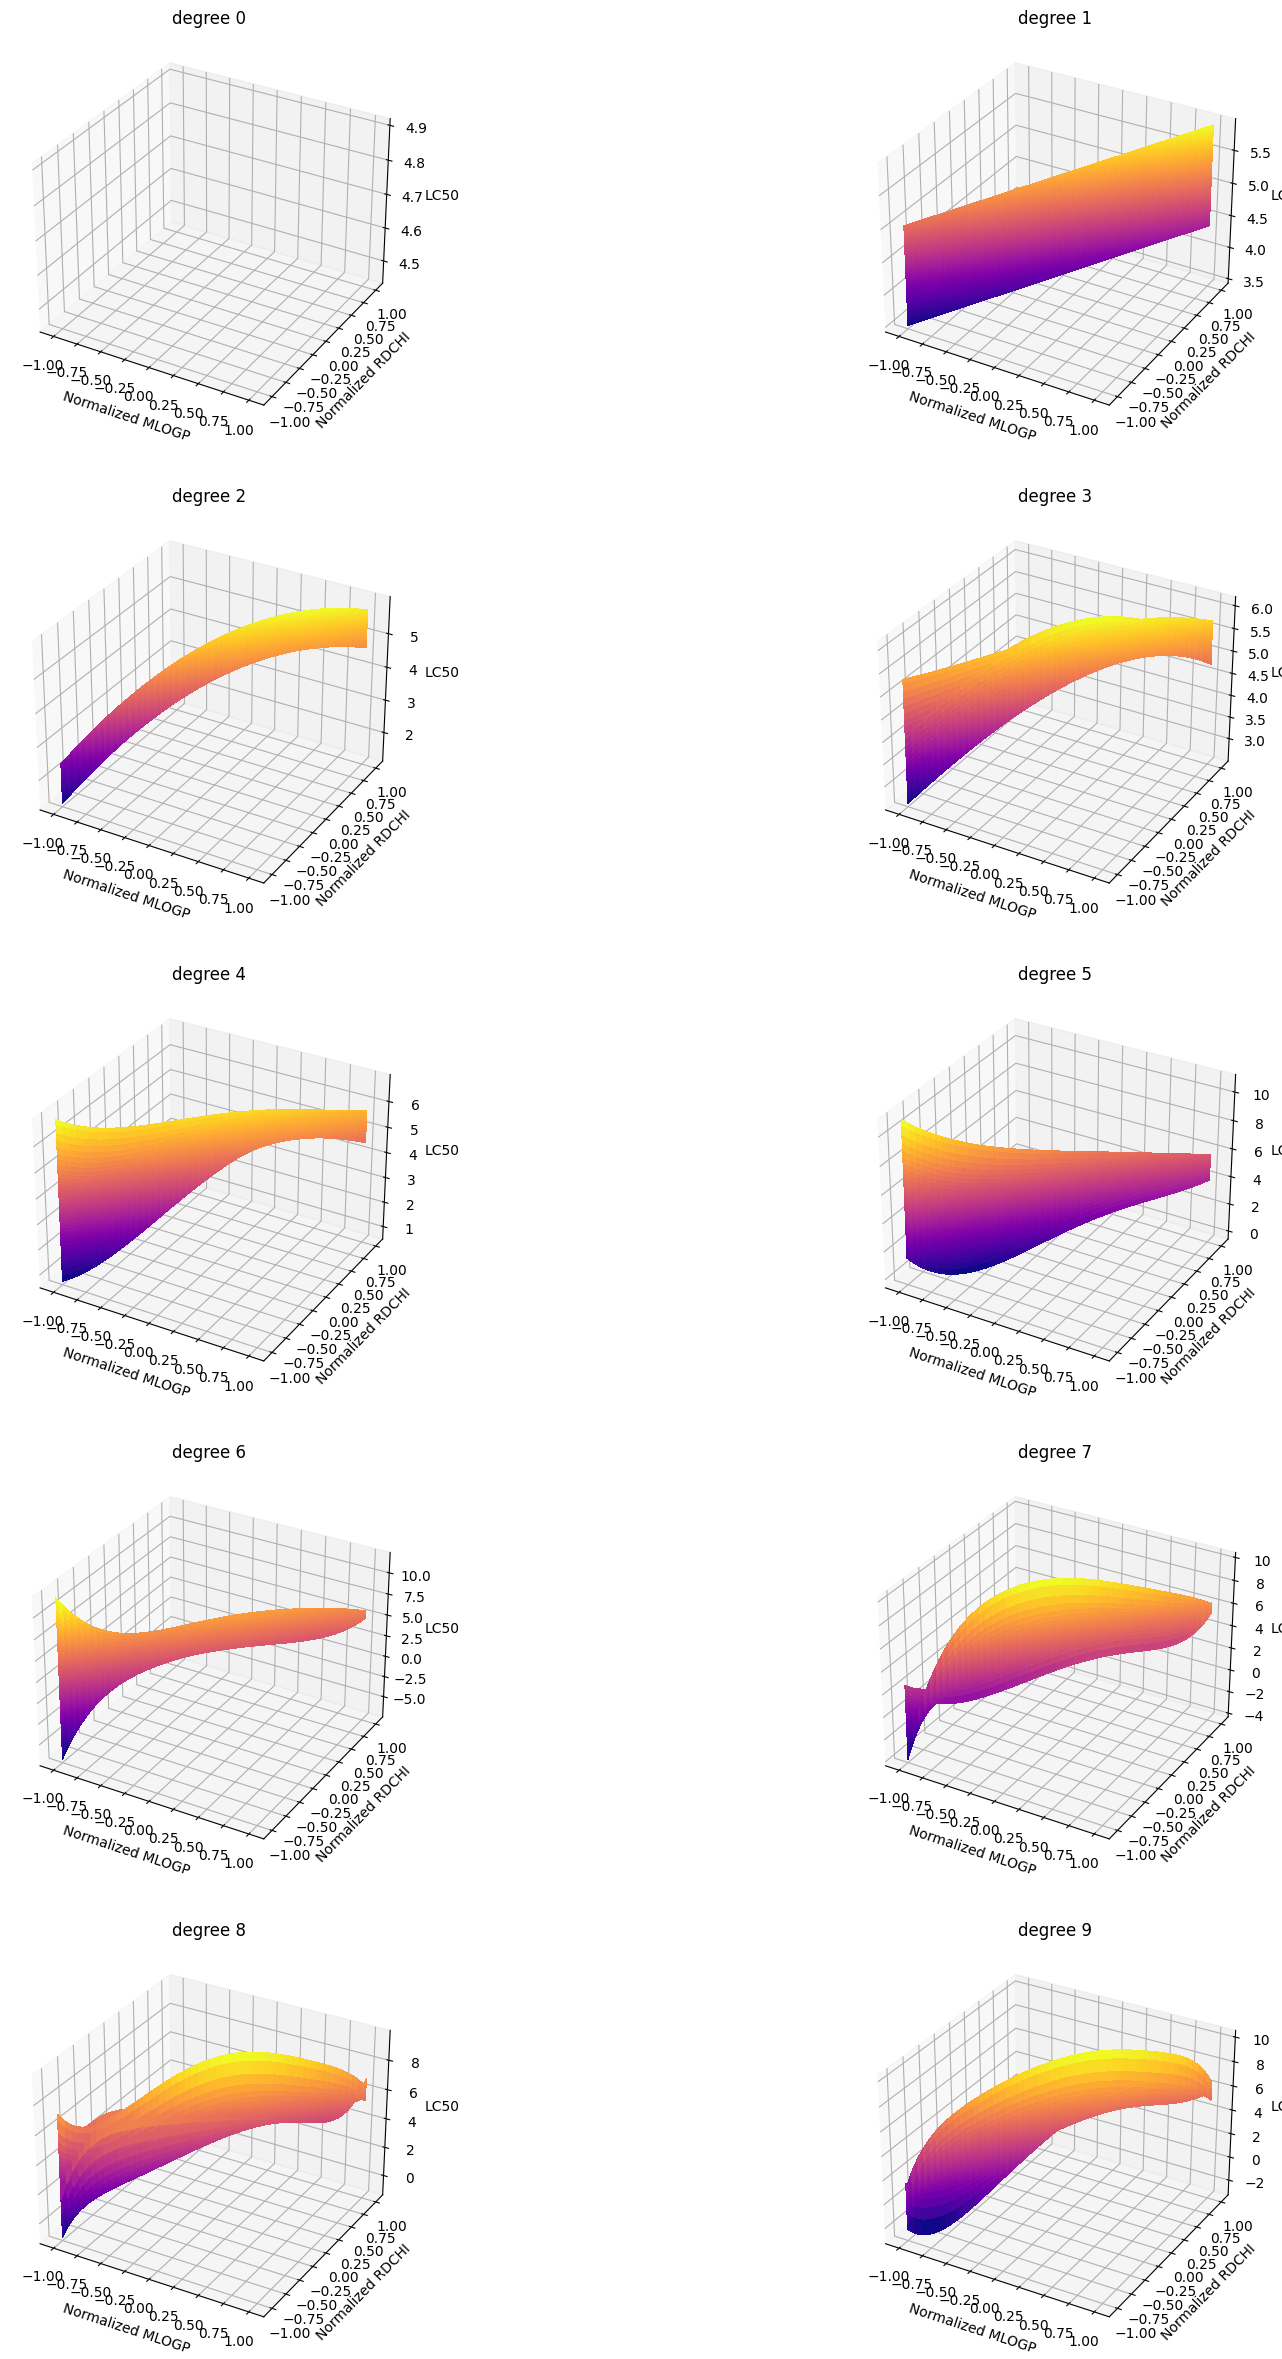

In [82]:
def predict(x1: np.float64, x2: np.float64, w: np.ndarray) -> np.float64:
    z = 0; idx = 0
    terms = len(w)
    for deg in range(10):
        for x1_power in range(deg + 1):
            z += w[idx] * (x1 ** x1_power) * (x2 ** (deg - x1_power))
            idx += 1
            if idx == terms:
                return z

def constructMatrix(x: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
    z = []
    for r in range(len(x)):
        temp = []
        for c in range(len(x[0])):
            temp.append(predict(x[r][c], y[r][c], w))
        z.append(np.array(temp))
    return np.array(z)
        

fig, ax = plt.subplots(5, 2, subplot_kw={"projection": "3d"})
fig.set_figheight(30)
fig.set_figwidth(20)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(x, y)

for m in range(len(gd_models)):
    z = constructMatrix(xx, yy, gd_models[m].W)
    r = m // 2; c = m % 2
    ax[r][c].plot_surface(x, y, z, cmap=cm.plasma, linewidth=0, antialiased=False)
    ax[r][c].set_xlabel('Normalized MLOGP')
    ax[r][c].set_ylabel('Normalized RDCHI')
    ax[r][c].set_zlabel("LC50")
    ax[r][c].set_title(f"degree {m}")

In [83]:
gd_models[0].W

array([4.67544714])